 ***importing necessary libraries***

In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from keras.applications import vgg16

***excluding top layers of VGG16***

In [ ]:
vgg_model = vgg16.VGG16(
    weights = "imagenet",
    include_top = False,
    input_shape = (224,224,3),
    classes = 15 
)

In [ ]:
vgg_model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_25 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

***freeze convolution layers of VGG16***

In [ ]:
model = tf.keras.models.Sequential()

for layer in vgg_model.layers:
  layer.trainable = False
  model.add(layer)

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

***adding custom top layers to VGG16***

In [ ]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(15, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)      

***model compilation***

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer="adam", metrics=["accuracy"])

***importing training and validation dataset***

In [ ]:
train = ImageDataGenerator(rescale = 1/255)
validation = ImageDataGenerator(rescale = 1/255)

In [ ]:
train_dataset = train.flow_from_directory("/content/drive/MyDrive/Project 6 Semester/Code/Cropped Dataset/Train",
                                          target_size=(224,224))
validation_dataset = validation.flow_from_directory("/content/drive/MyDrive/Project 6 Semester/Code/Cropped Dataset/Validation",
                                          target_size=(224,224))

Found 480 images belonging to 15 classes.
Found 120 images belonging to 15 classes.


***model fitting***

In [ ]:
#model.fit(train_dataset, validation_data=validation_dataset, steps_per_epoch=10, epochs=15)

Epoch 1/15
10/10 [==============================] - 222s 23s/step - loss: 5.7315 - accuracy: 0.1656 - val_loss: 1.2756 - val_accuracy: 0.7083
Epoch 2/15
10/10 [==============================] - 221s 23s/step - loss: 1.3294 - accuracy: 0.5844 - val_loss: 0.5844 - val_accuracy: 0.8833
Epoch 3/15
10/10 [==============================] - 241s 25s/step - loss: 0.4844 - accuracy: 0.8875 - val_loss: 0.3083 - val_accuracy: 0.9500
Epoch 4/15
10/10 [==============================] - 218s 22s/step - loss: 0.3169 - accuracy: 0.9344 - val_loss: 0.2243 - val_accuracy: 0.9583
Epoch 5/15
10/10 [==============================] - 218s 22s/step - loss: 0.2222 - accuracy: 0.9438 - val_loss: 0.1783 - val_accuracy: 0.9667
Epoch 6/15
10/10 [==============================] - 219s 23s/step - loss: 0.1785 - accuracy: 0.9594 - val_loss: 0.2085 - val_accuracy: 0.9667
Epoch 7/15
10/10 [==============================] - 221s 23s/step - loss: 0.1617 - accuracy: 0.9594 - val_loss: 0.1688 - val_accuracy: 0.9583
Epoch 

***plotting model accuracy***

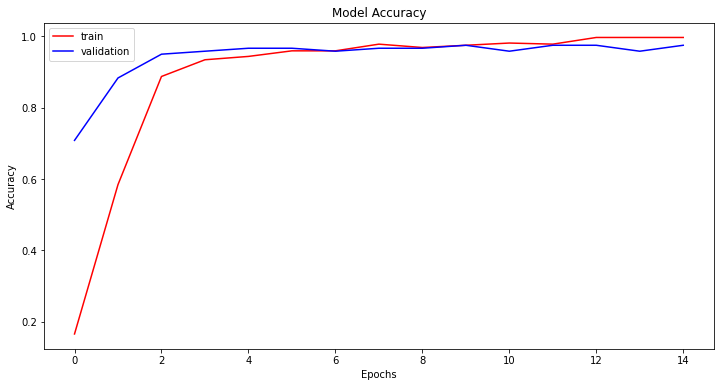

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['accuracy'], color='r')
plt.plot(model.history.history['val_accuracy'], color='b')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

***plotting model loss***

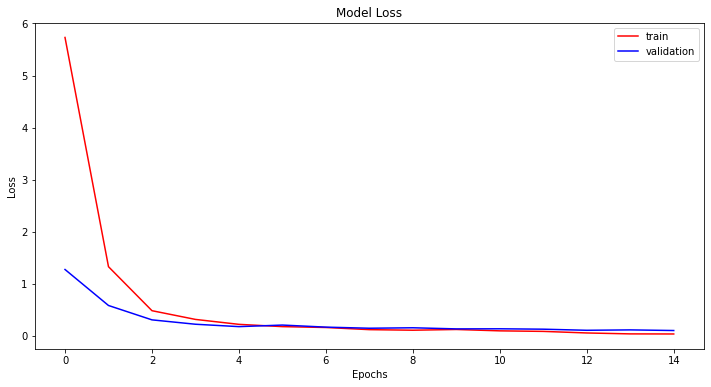

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(model.history.history['loss'], color='r')
plt.plot(model.history.history['val_loss'], color='b')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

***save model***

In [ ]:
#model.save("saved_model_vgg_final.h5")

***import saved model***

In [1]:
import keras
new_model = keras.models.load_model("saved_model_vgg_final.h5")  

I have predicted for test image using saved model in Prediction.ipynb file